# Cluster modular groups
This is a manual of [cluster_modular_group.sage](https://github.com/kmtm0723/ClusterModularGroup).

A *cluster modular group* is a symmetry group of a *cluster algebra*, which is generated by *mutation loops*.

AUTHOR:
- Shunsuke Kano

REFERENCES:
- [[IK19]](https://arxiv.org/abs/1911.07587)

To use this file, you have to load it first:

In [110]:
load('cluster_modular_group.sage')

This file consists of following classes:

- [**SeedPattern**](#SeedPattern)
- [**SignCone**](#SignCone)
- [**SignFan**](#SignFan)
- [**MutationLoop**](#MutationLoop)

We note that the classes SignFan and MutationLoop are the subclass of the class SeedPattern.

Maybe you will use [MutationLoop](#MutationLoop) mainly, so we recommend to read the usage of it first.

## SeedPattern
A *seed pattern* is an assignment of *seed datum* on each vertex of a given regular tree $\mathbb{T}_N$ such that each adjacent seed data are related by *mutation*.

In this file, the seed pattern is a restricted assignment to a edge path in the regular tree.
That is, for a vertex $t_0 \in \mathbb{T}_N$, we assign a seed datum associated to a given exchange matrix $B_0$.
If next we [mutate](#mutate(k)) at $k_0$ this seed datum, then we assign a new seed datum associated to a mutated exchange matrix $\mu_{k_0}B_0$ to a adjucent vertex $t_1$.
When iterate $h$ times this process, we finally obtain the seed assginment for an edge path $t_0 \overset{k_0}{-\!\!\!-\!\!\!-} t_1 \overset{k_1}{-\!\!\!-\!\!\!-} \cdots \overset{k_{h-1}}{-\!\!\!-\!\!\!-} t_h$.

The class object of SeedPattern storage the exchange matrix assigned to the ending vertex of the edge path and seeds assigned to other vertices as a [*trace*](#trace(t)) of it.
Namely, the mutated object is the seed 

### *class*  SeedPattern(B, D=None)

The *seed pattern* associated to an *exchange matrix*.

INPUT:
- ``B`` -- a skew-symmetric or skew-symmetrizable matrix
- ``D`` -- (default: ``None``); a symmetrizer of ``B``; a diagonal matrix with positive integers such that ``B*D`` is skew-symmetric

EXAMPLES:

In [2]:
B = matrix([
    [0,2],
    [-1,0]
])
D = matrix.diagonal([2,1])
S = SeedPattern(B, D)
S

In [3]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])
S = SeedPattern(B)
S.b_matrix()

[ 0  1 -1  0 -1  1]
[-1  0  0  1  0  0]
[ 1  0  0 -1  0  0]
[ 0 -1  1  0  1 -1]
[ 1  0  0 -1  0  0]
[-1  0  0  1  0  0]

In [4]:
S.mutate(0)
S.b_matrix()

[ 0 -1  1  0  1 -1]
[ 1  0 -1  1 -1  0]
[-1  1  0 -1  0  1]
[ 0 -1  1  0  1 -1]
[-1  1  0 -1  0  1]
[ 1  0 -1  1 -1  0]

In [5]:
S.trace(0).b_matrix() == B

True

### b_matrix()
Retrun the copy of the exchange matrix of a seed assigned to ending vertex of ``self``.

EXAMPLES:

In [6]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])
S = SeedPattern(B)
S.b_matrix()

[ 0  1 -1  0 -1  1]
[-1  0  0  1  0  0]
[ 1  0  0 -1  0  0]
[ 0 -1  1  0  1 -1]
[ 1  0  0 -1  0  0]
[-1  0  0  1  0  0]

In [7]:
S.mutate(0)
S.b_matrix()

[ 0 -1  1  0  1 -1]
[ 1  0 -1  1 -1  0]
[-1  1  0 -1  0  1]
[ 0 -1  1  0  1 -1]
[-1  1  0 -1  0  1]
[ 1  0 -1  1 -1  0]

### E(k, e, t=-1)
Return the presentation matrix of dual seed mutation in a direction toward ``k`` of sign = ``e`` at ``t``.

INPUT:
- ``k`` -- a direction of mutation
- ``e`` -- a sign of a seed mutation
- ``t`` -- (default -1); if -1, return the presentation matrix at ``self``, otherwise return the presentation matrix at ``self.trace(t)``

EXAMPLES:

In [8]:
B = matrix([
    [0,2],
    [-1,0]
])
D = matrix.diagonal([2,1])
S = SeedPattern(B, D)

In [9]:
S.mutate(0)
S.mutate(1)

In [10]:
S.E(0, 1)

[-1  0]
[ 0  1]

In [11]:
S.E(0, 1, t=1)

[-1  0]
[ 2  1]

### E_check(k, e, t=-1)
Return the presentation matrix of seed mutation in a direction toward ``k`` of sign = ``e`` at ``t``.

INPUT:
- ``k`` -- a direction of the mutation
- ``e`` -- a sign of the seed mutation
- ``t`` -- (default -1); if -1, return the presentation matrix at ``self``, otherwise return the presentation matrix at ``self.trace(t)``

EXAMPLES:

In [12]:
B = matrix([
    [0,2,0],
    [-1,0,1],
    [0,-1,0]
])
D = matrix.diagonal([2,1,1])
S = SeedPattern(B, D)

In [13]:
S.mutate(0)
S.mutate(2)

In [14]:
S.E_check(1, -1)

[ 1  0  0]
[ 2 -1  0]
[ 0  0  1]

In [15]:
S.E_check(1, -1, t=0)

[ 1  0  0]
[ 0 -1  1]
[ 0  0  1]

### mutate(k)
Storage the copy of ``self`` to its trace and mutate ``self`` in a direction toward ``k``.

INPUT:
- ``k`` -- a direction of the mutation

EXAMPLES:

In [16]:
B = matrix([
    [0,3],
    [-1,0]
])
D = matrix.diagonal([3,1])
S = SeedPattern(B, D)

In [17]:
S.mutate(1)
S.mutate(0)
S.mutate(1)

In [18]:
S.trace(0).b_matrix(), S.trace(1).b_matrix(), S.trace(2).b_matrix(), S.b_matrix()

(
[ 0  3]  [ 0 -3]  [ 0  3]  [ 0 -3]
[-1  0], [ 1  0], [-1  0], [ 1  0]
)

### rank()
Return the size of the index set of ``self``.

EXAMPLES:

In [19]:
B = matrix([
    [0,2,0],
    [-1,0,1],
    [0,-1,0]
])
D = matrix.diagonal([2,1,1])
S = SeedPattern(B, D)

In [20]:
S.rank()

3

### trace(t)
If ``self`` is the seed pattern on the path $t_0 \overset{k_0}{-\!\!\!-\!\!\!-} t_1 \overset{k_1}{-\!\!\!-\!\!\!-} \cdots \overset{k_{h-1}}{-\!\!\!-\!\!\!-} t_h$ such that $h \neq 0$ and input ``t`` be an integer between 0 and $h-1$, then return the seed at $t_\mathsf{t}$.

INPUT:
- ``t``-- an integer between 0 and length of trace of ``self``

In [21]:
B = matrix([
    [0,2,0],
    [-1,0,1],
    [0,-1,0]
])
D = matrix.diagonal([2,1,1])
S = SeedPattern(B, D)

In [22]:
S.mutate(0)
S.mutate(1)
S.mutate(2)

In [23]:
S.trace(0).b_matrix(), S.trace(1).b_matrix(), S.trace(2).b_matrix(), S.b_matrix()

(
[ 0  2  0]  [ 0 -2  0]  [ 0  2  0]  [ 0  2  0]
[-1  0  1]  [ 1  0  1]  [-1  0 -1]  [-1  0  1]
[ 0 -1  0], [ 0 -1  0], [ 0  1  0], [ 0 -1  0]
)

## SignCone
A *sign cone* is a cone of [sign fan](#SignFan), which is consisted by a convex rational polyedral cone with presentation matrix.
In this file, sign cone is given by the inward normal vectors of the cone, presentation matrix $M$ and sign associtated to $M$.

### *class* SignCone(vects, matrix, sign, perm=None)¶
The *sign fan* associated to the input data.

INPUT:
- ``vects`` -- the list of inward normal vectors (Should not be minimal.)
- ``matrix`` -- the presentation matrix
- ``sign``-- the list of signs

### cone()
Return the [Convex rational polyhedral cones](http://doc.sagemath.org/html/en/reference/discrete_geometry/sage/geometry/cone.html?highlight=polyhedral%20cone#module-sage.geometry.cone) associated to ``self``.

In [70]:
c = SignCone([[1,0,0],[0,1,0],[0,0,1]], matrix.zero(3), [])

In [71]:
c.cone()

3-d cone in 3-d lattice N

### dim()
Return the dimension of the [cone](#cone()) of ``self``.

### is_invariant(f)
Check ``self`` is invariant under the mutation loop ``f``.

INPUT:
- ``f`` -- the mutation loop

OUTPUT:
- ``True`` if ``f(cone(self))`` is contained in ``cone(self)``, ``False`` otherwise

In [24]:
B = Matrix([
        [0,2,-2],
        [-2,0,2],
        [2,-2,0]
    ])
f = MutationLoop(B, [0,1],[1,2,0])

In [25]:
c = SignCone([[1, 0, 0], [2, 0, 1], [0, -1, 0]], matrix.identity(3), [])

In [26]:
c.is_invariant(f)

True

### normal_vectors()
Return the inward normal vectors of facets of ``self``.
(It is not equal to the input datum ``vects``.)

In [72]:
c = SignCone([[1,0,0],[0,1,0],[0,0,1],[1,1,2]], matrix.zero(3), [])

In [73]:
c.normal_vectors()

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

### presentation_matrix()
Return the presentation matirx associtated to ``self``.

### rays()
Return the list of rays of ``cone(self)``.

### show()
Print the rays of ``cone(self)`` and presentation matrix of ``self``.

### sign()
Retrun the list of signs of ``self``.

## SignFan
A *sign fan* is a complete fan on the tropical cluster $\mathcal{X}$-variety corresnponds to a mutation sequence $f$ such that the induced PL map, called tropical cluster $\mathcal{X}$-transformation of $f$ is linear on each cone of the fan.
In this file, a *sign fan* is a collection of [sign cones](#SignCone), especially the corresponding cones form a fan satisfying above condition.
The class *SignFan* is a subclass of [*SeedPattern*](#SeedPattern).

### *class* SignFan(B, seq, perm=None, D=None, mentions=True)
The sign fan of the mutation sequence generated by the given data.

INPUT:
- ``B`` -- a skew symmetrizable matrix
- ``seq`` -- a list consists of some numbers from 0 to the number of rows of ``B`` -1; it corresponds to the indices to mutate; ``seq[i]`` is the ``i``th index to mutate
- ``perm`` -- a list consists of numbers from 0 to the number of rows of ``B`` -1; it is corresponds to the permutation of indices; ``perm[i]`` is the image of ``i`` by the permutation
- ``D`` -- (default: ``None``); if ``B`` is not skew symmetric, it is a symmetrizer of ``B``
- ``mentions`` -- (default: ``True``);if ``True``, print some mentions; if you are worrywart, we recommend to input as ``True``

EXAMPLES:

### base_matrix()
Return the $B$-matrix of seed at the time 0.

EXAMPLES:

In [27]:
B = matrix([
    [0,2,0],
    [-1,0,1],
    [0,-1,0]
])
D = matrix.diagonal([2,1,1])
S = SeedPattern(B, D)

In [28]:
f = MutationLoop(B,[0,1,2],[0,1,2],D)

In [29]:
f.base_matrix() == B

True

### cone()
Return the list of [Convex rational polyhedral cones](http://doc.sagemath.org/html/en/reference/discrete_geometry/sage/geometry/cone.html?highlight=polyhedral%20cone#module-sage.geometry.cone) associated to [sign cones](#SignCone) in ``self``.

### dim()
Return the dimension of the fan of ``self``.

### facets()
Return the list of facets (codimension 1 cones) of ``self``.

### n()
Return the number of max dimensional cones of ``self``.

In [89]:
B = Matrix([
        [0,2,-2],
        [-2,0,2],
        [2,-2,0]
    ])

In [90]:
F = SignFan(B, [0,1])

The input is NOT fully mutated.


In [85]:
F.n()

4

In [98]:
F = SignFan(B, [0,1,2,0])

In [99]:
F.n()

11

### permutation()
Retrun the perumtation of the mutation sequence of ``self``.

### project(basis)
Return the projected fan into the subspace spaned by ``basis``.

### plot_stereographic_projection(figsize=[4,4], axes=True, color='blue', thickness=1)
When ``self`` is defined on seed pattern of rank 3, return the 2d plot of stereographic projection from (1,1,1) to the plane whose normal vector is also (1,1,1).

INPUT:
- ``figsize`` -- (default: ``[4,4]``); the size of figure
- ``axes`` -- (default: ``True``); if ``True``, drow the axes
- ``color`` -- (default: ``'blue'``); the color of plots
- ``thickness`` -- (default: 1); the thickness of arcs of plots

EXAMPLES:

In [89]:
B = Matrix([
        [0,2,-2],
        [-2,0,2],
        [2,-2,0]
    ])

In [101]:
F = SignFan(B, [1,2,0,1])

number of facets: 19


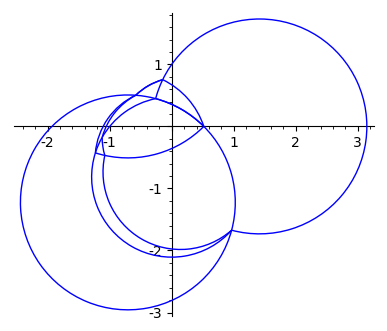

In [102]:
F.plot_stereographic_projection()

### sequence()
Return the list of mutating indices corresponds to the mutation sequence of ``self``.

### show()
Print the details of max dimensional sign cones contained in ``self``.

In [111]:
B = Matrix([
        [0,2,-2],
        [-2,0,2],
        [2,-2,0]
    ])

In [116]:
F = SignFan(B, [1,2])

The input is NOT fully mutated.


In [117]:
F.show()

number of 3 dimensional cones: 4 

list of cones:
[ 0 ]
sign: [1, 1]
rays: [[0, 1, 0], [0, 0, 1], [1, 0, 0], [-1, 0, 0]]
presentation matrix: 
[ 1  2  2]
[ 0 -1  0]
[ 0  0 -1] 

[ 1 ]
sign: [1, -1]
rays: [[0, 1, 0], [0, 0, -1], [1, 0, 0], [-1, 0, 0]]
presentation matrix: 
[ 1  2  0]
[ 0 -1  2]
[ 0  0 -1] 

[ 2 ]
sign: [-1, 1]
rays: [[0, 0, 1], [0, -1, 2], [1, 0, 0], [-1, 0, 0]]
presentation matrix: 
[ 1  4  2]
[ 0 -1  0]
[ 0 -2 -1] 

[ 3 ]
sign: [-1, -1]
rays: [[0, -1, 2], [0, 0, -1], [1, 0, 0], [-1, 0, 0]]
presentation matrix: 
[ 1  0  0]
[ 0  3  2]
[ 0 -2 -1] 



### sign_cones()
Return the list of max dimensional sign cones contained in ``self``.

### sings()
Return the list of list of signs which corresponds to some max dimensional sign cones contained in ``self``.

## MutationLoop
A *mutation loop* is consists of a skew symmetrizable matrix $B$, a sequence of indices $(k_0, k_1, \dots, k_{h-1})$ and a permutation $\sigma$ satisfying the mutated and permutated matrix $\sigma . \mu_{k_{h-1}} \cdots \mu_1 \mu_0 B$ coincides with the original matrix $B$.
This class is a subclass of [SeedPattern](#SeedPattern).

### *class* MutationLoop(B, seq, perm, D=None)
INPUT:
- ``B`` -- the skew symmetrizable matrix
- ``seq`` -- a list consists of some numbers from 0 to the number of rows of ``B`` -1; it corresponds to the indices to mutate; ``seq[i]`` is the ``i``th index to mutate
- ``perm`` -- a list consists of numbers from 0 to the number of rows of ``B`` -1; it is corresponds to the permutation of indices; ``perm[i]`` is the image of ``i`` by the permutation; satisfying the above condition
- ``D`` -- (default: ``None``); if ``B`` is not skew symmetric, it is a symmetrizer of ``B``

EXAMPLES:

###  a_trop_transformation(a)
Return the mutated ``a`` in $\mathcal{A}(\mathbb{R}^\mathrm{trop})$, the presentation matrix and the list of signs.

INPUT:
- ``a`` -- a list of real numbers of length ``self.rank()``; a point of $\mathcal{A}(\mathbb{R}^\mathrm{trop})$    


In [203]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])

In [204]:
f = MutationLoop(B, [0, 4, 2, 1], [4, 3, 1, 2, 5, 0])

In [206]:
f.a_trop_transformation([1,1,1,1,1,100])

(
                              [ 0  0  0  0  0  1]                
                              [-1  1 -1  1  0  1]                
                              [ 0  0  0  1  0  0]                
                              [-2  1 -1  2 -1  2]                
                              [-1  1  0  0  0  1]                
[100, 100, 1, 199, 100, 100], [-1  1  0  1 -1  1], [-1, 0, 0, -1]
)

### base_matrix()
Return the $B$-matrix of seed at the time 0.

In [30]:
B = matrix([
    [0,2,0],
    [-1,0,1],
    [0,-1,0]
])
D = matrix.diagonal([2,1,1])
S = SeedPattern(B, D)

In [31]:
f = MutationLoop(B,[0,1,2],[0,1,2],D)

In [32]:
f.base_matrix() == B

True

### c_matrix()
Retrun the $C$-matrix associated to the last seed of ``self``.

### compose(f, show=True)
         
Return the mutation loop as ``f*self``.

INPUT:
- ``f`` -- a mutation loop with the same [base matrix](#base_matrix())

In [33]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])

In [34]:
f0 = MutationLoop(B, [0,4], [4,1,0,2,3,5])

In [35]:
f1 = MutationLoop(B, [0,1], [1,3,2,5,4,0])

In [36]:
f = f0.compose(f1)

sequence of vertices: [0, 4, 2, 1]
permutation: [4, 3, 1, 2, 5, 0]


### contract()
Remove the sublist like as ``[i,i]`` contained in ``seq`` of ``self``.

EXAMPLES:

In [37]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])

In [38]:
f = MutationLoop(B, [0,1,2,2,1,4], [4,1,0,2,3,5])

In [39]:
f.contract()

contracted sequence of vertices: [0, 1, 1, 4]


In [40]:
f.contract()

contracted sequence of vertices: [0, 4]


In [41]:
f.contract()

contracted sequence of vertices: [0, 4]


### deform(r)
Apply the square (resp. pentagon) move at ``r``th place in ``seq`` of ``self`` when ``self.trace(r).b_matrix()[seq[r], seq[r]]= 0`` (resp. ``=1``).

INPUT:
- ``r`` -- an integer from ``0`` to ``length(self)-1``.

EXAMPLES:

In [42]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])

In [43]:
f = MutationLoop(B, [0,1,5,5], [1,3,2,5,4,0])

In [44]:
f.deform(1)

deformed sequence of vertices: [0, 5, 1, 5]
deformed permutation: [1, 3, 2, 5, 4, 0]


In [45]:
f.deform(0)

deformed sequence of vertices: [5, 0, 5, 1, 0]
deformed permutation: [0, 3, 2, 5, 4, 1]


In [46]:
B = matrix([
    [0,2,-2],
    [-2,0,2],
    [2,-2,0]
])

In [47]:
f = MutationLoop(B, [0,1], [2,0,1])

In [48]:
f.deform(0)

Cannot deform at 0


### E_check_matrix(sign)
Return the presentation matrix of seed mutation on the lattice $N^{(t_0)}$ with signs is ``sign``.
If there is a cone in the sign fan of ``self``, it is fact that the matrix coincides with the presentation matrix of tropical $\mathcal{A}$-transformation of ``self``.

INPUT:
- ``sign`` -- a sequence of signs of length ``self.length()``


### E_matrix(sign)
Return the presentation matrix of seed mutation on the lattice $M^{(t_0)}$ with signs is ``sign``.
If there is a cone in the sign fan of ``self``, it is fact that the matrix coincides with the presentation matrix of tropical $\mathcal{X}$-transformation of ``self``.

INPUT:
- ``sign`` -- a sequence of signs of length ``self.length()``
        

### fixed_points_in_x(trace=False)
Return the fixed poins in PX^trop and whose stretch factors.

INPUT:
- ``trace`` -- bool(default ``False``); whether print signs being processed

EXAMPLES:

In [49]:
B = matrix([
    [0,2,-2],
    [-2,0,2],
    [2,-2,0]
])

In [50]:
f = MutationLoop(B, [0,1,2,0], [2,0,1])

In [51]:
f.fixed_points_in_x(True)

11 max dimensional cones.
[1, 1, 1, -1]
[1, 1, -1, -1]
[1, -1, 1, -1]
coordinate: (1, -1.618033988749895?, 0.618033988749895?)
stretch factor 6.854101966249684? 

[1, -1, -1, -1]
[-1, 1, 1, 1]
[-1, 1, -1, 1]
coordinate: (-1, 2.618033988749895?, -1.618033988749895?)
stretch factor 0.1458980337503155? 

[-1, 1, -1, -1]
[-1, -1, 1, 1]
[-1, -1, 1, -1]
[-1, -1, -1, 1]
[-1, -1, -1, -1]


[[(1, -1.618033988749895?, 0.618033988749895?), 6.854101966249684?],
 [(-1, 2.618033988749895?, -1.618033988749895?), 0.1458980337503155?]]

In [52]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])

In [53]:
f = MutationLoop(B, [0,1], [1,3,2,5,4,0])

In [54]:
f.fixed_points_in_x()

The input is NOT fully mutated.
4 max dimensional cones.


[[(0, 0, 1, 0, 0, 0), 1],
 [(0, 0, 0, 0, 1, 0), 1],
 [(0, -1, 0, 1, 0, 0), 1],
 [(-1, 1, 0, 0, 0, 0), 1],
 [(-1, 0, 0, 1, 0, 0), 1]]

### g_matrix()
    
Retrun the $G$-matrix associated to the last seed of ``self``.

### length()
Return the length of list ``seq`` of indices of ``self``.

### may_be_basic_sign_stable(m=50)
Check ``self`` is basic sign-stable roughly.
That is, chase the orbit of rays of $\mathcal{C}^+_{(t_0)}$ and $\mathcal{C}^-_{(t_0)}$ by the action of ``self``.

INPUT:
- ``m`` -- (default: ``50``); a positive integer; the range of the time to chasing the movement of the rays

OUTPUT:

If converge rays of $\mathcal{C}^+_{(t_0)}$ to the same ray $\ell_+$ and also rays of $\mathcal{C}^-_{(t_0)}$ to the same ray $\ell_-$ up to arrowable error (``=10^-5``)

In [55]:
B = matrix([
    [0,3],
    [-3,0]
])

In [56]:
f = MutationLoop(B, [0], [1,0])

In [57]:
f.may_be_basic_sign_stable()

``self`` may be sign stable on C^+ cup C^-.


True

In [58]:
B = matrix([
    [ 0, -2,  2,  4,  2, -2],
    [ 2,  0, -6, -6,  0,  2],
    [-2,  6,  0, -6, -6,  4],
    [-4,  6,  6,  0, -6,  2],
    [-2,  0,  6,  6,  0, -2],
    [ 2, -2, -4, -2,  2,  0]])

In [59]:
f = MutationLoop(B, [0], [5,0,1,2,3,4])

In [60]:
f.may_be_basic_sign_stable()

``self`` may be two-sided sign stable.


True

### perm_matrix()
Retrun the presentation matrix of the permutation ``perm`` of ``self``.

### inverse()
Return the mutation loop which is the inverse of ``self``.

EXAMPLES:

In [61]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])

In [62]:
f = MutationLoop(B, [3,1], [5,0,2,1,4,3])

In [63]:
f.inverse().show()

sequence of vertices: [0, 1]
permutation: [1, 3, 2, 5, 4, 0]


### iterate(m, show=True)
Return the mutation loop which is the iterated ``self``.

INPUT:
- ``m`` -- a positive integer; the output is ``self^m``

### invariant_cones(M, show=True, mentions=True)
Return the invariant cones in the sign fan of ``self``.

INPUT:
- ``M`` -- a positive integer; check for ``self.iterate(M)``

EXAMPLES:

In [142]:
B = Matrix([
        [0,2,-2],
        [-2,0,2],
        [2,-2,0]
    ])

In [143]:
f = MutationLoop(B, [0,1,2,0], [2,0,1])

In [147]:
f.invariant_cones(2)

Find the invariant cones:
[1]:
rays: [[1, 0, -2], [0, 0, 1], [0, -1, 0]]
presentation matrix: 
[ 22 -12   9]
[-33  22 -12]
[ 12  -9   4]




### is_equivalent_to(f)
Check ``self`` is equivalent to ``f``.

INPUT:
- ``f`` -- a mutation loop with same [base matrix](#base_matrix())

In [156]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])

In [185]:
f = MutationLoop(B, [0,1,5,5], [1,3,2,5,4,0])

In [197]:
f1 = deepcopy(f)
f1.contract()

contracted sequence of vertices: [0, 1]


In [194]:
f2 = deepcopy(f)
f2.deform(1)

deformed sequence of vertices: [0, 5, 1, 5]
deformed permutation: [1, 3, 2, 5, 4, 0]


In [198]:
f.is_equivalent_to(f1)

True

In [199]:
f.is_equivalent_to(f2)

True

### is_basic_sign_stable(M=5, m=50)

Check ``self`` is basic sign-stable.

INPUT:
- ``M`` -- (default: ``5``); a positive integer; the range of the induction method
- ``m`` -- (default: ``50``); a positive integer; the range of the time to chasing the movement of the rays

EXAMPLES:

In [64]:
B = matrix([
    [ 0, -2,  2,  4,  2, -2],
    [ 2,  0, -6, -6,  0,  2],
    [-2,  6,  0, -6, -6,  4],
    [-4,  6,  6,  0, -6,  2],
    [-2,  0,  6,  6,  0, -2],
    [ 2, -2, -4, -2,  2,  0]])

In [65]:
f = MutationLoop(B, [0], [5,0,1,2,3,4])

In [66]:
f.is_basic_sign_stable()

``self`` may be NOT basic sign-stable.


### iterated_trial_in_a(a, m, trace=False, err=10^-4)
This method is an itarated trial in PA^trop.
If 'a' is converging to a point, then return the sign at the point.

INPUT:
- ``a`` -- a point in A^trop
- ``m`` -- a number of times to hit
- ``trace`` -- bool(default: ``False``); whether print coordinates and signs during ``a`` is wandering
- ``err`` -- arrowable error (default: 10^-4)
    
EXAMPLES:

In [129]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])

In [130]:
f = MutationLoop(B, [0, 4, 2, 1], [4, 3, 1, 2, 5, 0])

In [134]:
f.iterated_trial_in_a([1,1,1,1,1,100], trace=True)

[ 1 ] 
a= [0.354436149816687, 0.354436149816687, 0.00354436149816687, 0.705327938135207, 0.354436149816687, 0.354436149816687] 
sign: [-1, 0, 0, -1] 

[ 2 ] 
a= [0.170099762998890, 0.506897293736691, 0.338498528367790, 0.675296059105592, 0.170099762998890, 0.338498528367790] 
sign: [-1, 1, 1, -1] 

[ 3 ] 
a= [0.135010357364962, 0.403674184081168, 0.269342270723065, 0.672338010797374, 0.269342270723065, 0.470840140760220] 
sign: [-1, 1, 1, -1] 

[ 4 ] 
a= [0.173429244462328, 0.420828310770260, 0.247648964354708, 0.692967283708986, 0.272388870985501, 0.420828310770260] 
sign: [-1, 1, 1, -1] 

[ 5 ] 
a= [0.162542139104593, 0.430099626989352, 0.267654009345034, 0.688101490306797, 0.258098384777721, 0.420544002422039] 
sign: [-1, 1, 1, -1] 

[ 6 ] 
a= [0.160911161712249, 0.424159901828133, 0.263285671757315, 0.687408641944017, 0.263285671757315, 0.427816134329742] 
sign: [-1, 1, 1, -1] 

[ 7 ] 
a= [0.163069822125686, 0.425073925147376, 0.262018180181750, 0.688471667014927, 0.263411819027610

[-1, 1, 1, -1]

In [136]:
f.iterated_trial_in_a([1,1,0,1,1,0], m=20, trace=True)

[ 1 ] 
a= [0.000000000000000, 0.707106781186547, 0.707106781186547, 0.000000000000000, 0.000000000000000, 0.000000000000000] 
sign: [0, 0, 0, 0] 

[ 2 ] 
a= [0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.707106781186548, 0.707106781186548] 
sign: [0, 0, 0, 0] 

[ 3 ] 
a= [0.500000000000000, 0.500000000000000, 0.000000000000000, 0.500000000000000, 0.500000000000000, 0.000000000000000] 
sign: [0, 0, 0, 0] 

[ 4 ] 
a= [0.000000000000000, 0.707106781186547, 0.707106781186547, 0.000000000000000, 0.000000000000000, 0.000000000000000] 
sign: [0, 0, 0, 0] 

[ 5 ] 
a= [0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.707106781186548, 0.707106781186548] 
sign: [0, 0, 0, 0] 

[ 6 ] 
a= [0.500000000000000, 0.500000000000000, 0.000000000000000, 0.500000000000000, 0.500000000000000, 0.000000000000000] 
sign: [0, 0, 0, 0] 

[ 7 ] 
a= [0.000000000000000, 0.707106781186547, 0.707106781186547, 0.000000000000000, 0.000000000000000, 0.0000000000

### iterated_trial_in_x(x, m=100, trace=False, err=10^-4)
This method is an itarated trial in PX^trop.
If 'x' is converging to a point, then return the sign at the point.

INPUT:
- ``x`` -- a point in X^trop
- ``m`` -- (default: 100) a number of times to hit
- ``trace`` -- bool(default: ``False``); whether print coordinates and signs during ``x`` is wandering
- ``err`` -- arrowable error (default: 10^-4)
        
EXAMPLES:

In [125]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])

In [126]:
f = MutationLoop(B, [0, 4, 2, 1], [4, 3, 1, 2, 5, 0])

In [128]:
f.iterated_trial_in_x([1]*6, trace=True)

[ 1 ]
x= [0.127000127000191, -0.254000254000381, 0.762000762001143, -0.127000127000191, 0.508000508000762, -0.254000254000381] 
sign: [1, 1, 1, 1] 

[ 2 ]
x= [-0.102597835208515, -0.461690258438319, 0.564288093646835, 0.102597835208515, 0.564288093646835, -0.359092423229804] 
sign: [1, 1, 1, -1] 

[ 3 ]
x= [-0.186771841909407, -0.456553391334106, 0.498058245091752, 0.228276695667053, 0.498058245091752, -0.456553391334106] 
sign: [-1, 1, 1, -1] 

[ 4 ]
x= [-0.255666298967417, -0.453601498167999, 0.486590698034762, 0.255666298967417, 0.470096098101381, -0.453601498167999] 
sign: [-1, 1, 1, -1] 

[ 5 ]
x= [-0.272660252041443, -0.459717866814062, 0.466058802908049, 0.272660252041443, 0.466058802908049, -0.453376930720075] 
sign: [-1, 1, 1, -1] 

[ 6 ]
x= [-0.277627769853810, -0.458267672509783, 0.460692369189729, 0.280052466533756, 0.460692369189729, -0.458267672509783] 
sign: [-1, 1, 1, -1] 

[ 7 ]
x= [-0.281627692608807, -0.457934979579724, 0.459790845758366, 0.281627692608807, 0.4588629

[-1, 1, 1, -1]

### show()
        
Print ``self``

EXAMPLES:

In [67]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])

In [68]:
f = MutationLoop(B, [0,4], [4,1,0,2,3,5])

In [69]:
f.show()

sequence of vertices: [0, 4]
permutation: [4, 1, 0, 2, 3, 5]


### sign_fan(mentions=True)

Retrun the [sign fan](#SignFan) associated to the mutation sequence ``self``.

### trop_sign()
    
Return the tropical sign sequence of ``self``.
That is, return the sequence of signs associated to ``[1]*self.length()``.

### x_trop_transformation(x)
Return the mutated ``x`` in $\mathcal{X}(\mathbb{R}^\mathrm{trop})$, the presentation matrix and the list signs.
        
INPUT:
- ``x`` -- a point of X^trop

EXAMPLES:



In [200]:
B = matrix([
    [ 0,  1, -1,  0, -1,  1],
    [-1,  0,  0,  1,  0,  0],
    [ 1,  0,  0, -1,  0,  0],
    [ 0, -1,  1,  0,  1, -1],
    [ 1,  0,  0, -1,  0,  0],
    [-1,  0,  0,  1,  0,  0]
])

In [201]:
f = MutationLoop(B, [0, 4, 2, 1], [4, 3, 1, 2, 5, 0])

In [202]:
f.x_trop_transformation([1]*6)

(
                       [ 0  0  0  0  0  1]              
                       [-1  0 -1  0  0  0]              
                       [ 2  1  1  1  1  0]              
                       [ 0 -1  0  0  0  0]              
                       [ 1  1  1  0  1  0]              
[1, -2, 6, -1, 4, -2], [-1  0  0  0 -1  0], [1, 1, 1, 1]
)